In [0]:

# Load the Drive helper and mount
from google.colab import drive

# # This will prompt for authorization.
drive.mount('/content/drive')

# 1. click the link below and authorize it in google drive 
# 2. paste the link in tq he white box7lñ.ijkughtydesw

In [0]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint

import cv2
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import os
#os.chdir("Manually_Annotated_Images/")

os.chdir("/content/drive/My Drive/Networkly/Emotion/Datasets/AffectNet_Database/Manually_Annotated_compressed/Manually_Annotated_Images/")

os.listdir('/content')
import collections
from sklearn.utils import shuffle

# Build models 

In [0]:
def load_data():
  print('loading data....')
  images=np.load('11_1_final_images_combine_all_history.npy')
  labels=np.load('11_1_final_labels_combine_all_history.npy')
  # [i for i in os.listdir(os.getcwd()) if i.startswith('11_')]
  data_dir={0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger',
            7: 'Contempt', 8: 'None', 9: 'Uncertain', 10: 'No-Face'}
# count label 
  print('number of expressions')
  cnt=collections.Counter(labels)
  for idx,num in cnt.items():
    print("{} {} faces".format(num,data_dir.get(idx)))
  labels = pd.get_dummies(labels, sparse=True)
  images = np.expand_dims(images, axis=3)

  images, labels = shuffle(images, labels, random_state=0)
  X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
#   release memory
  del labels, images
  return X_train, X_test, y_train, y_test

def print_memory():
  import sys
  for var, obj in locals().items():
    if sys.getsizeof(obj)>5000:
      print (var, sys.getsizeof(obj),end='')

def build_model(num_features = 64,num_labels = 8,input_shape=(128, 128, 1)):

  model = Sequential()

  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last'))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2*2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*num_features, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_labels, activation='softmax'))
  # model.summary()

  model.compile(loss=categorical_crossentropy,
                optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                metrics=['accuracy'])
  return model

def fit_model(patience=8,batch_size=200,epochs = 50):
  lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
  early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=1, mode='auto')
  output_path='/content/drive/My Drive/Networkly/Emotion/11_4_weights.hdf5'
  checkpointer = ModelCheckpoint(output_path, monitor='val_loss', verbose=1, save_best_only=True)
  model.fit(np.array(X_train), np.array(y_train),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(np.array(X_test), np.array(y_test)),
        shuffle=True,
        callbacks=[lr_reducer, early_stopper, checkpointer])

In [0]:
os.listdir(os.getcwd())

In [0]:
# Run loading data and build models
# X_train, X_test, y_train, y_test=load_data()

# model=build_model()
path='/content/drive/My Drive/Networkly/Emotion/11_4_weights.hdf5'
model.load_weights(path)

In [0]:

fit_model(batch_size=200,epochs=200)

Train on 104393 samples, validate on 44741 samples
Epoch 1/200
104393/104393 [==============================] - 1069s 10ms/step - loss: 0.5208 - acc: 0.8239 - val_loss: 0.7705 - val_acc: 0.7515

Epoch 00001: val_loss improved from inf to 0.77052, saving model to /content/drive/My Drive/Networkly/Emotion/11_4_weights.hdf5
Epoch 2/200
104393/104393 [==============================] - 1047s 10ms/step - loss: 0.5043 - acc: 0.8292 - val_loss: 0.8082 - val_acc: 0.7393

Epoch 00002: val_loss did not improve from 0.77052
Epoch 3/200
104393/104393 [==============================] - 1047s 10ms/step - loss: 0.4959 - acc: 0.8348 - val_loss: 0.7922 - val_acc: 0.7481

Epoch 00003: val_loss did not improve from 0.77052
Epoch 4/200
104393/104393 [==============================] - 1048s 10ms/step - loss: 0.4765 - acc: 0.8407 - val_loss: 0.7979 - val_acc: 0.7540

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 00004: val_loss did not improve from 0.77052
Epoch 5/200

In [0]:
from shutil import copyfile
copyfile('/content/weights.hdf5',os.path.join(os.getcwd(),'11_3_weights.hdf5'))
import glob
glob.glob(os.path.join(os.getcwd(),'*.hdf5'))

In [0]:
model.save_weights(os.path.join(os.getcwd(),'best11_3_weights.hdf5'))

# Model evaluation

In [0]:

#     model=build_model()
    model.load_weights(os.path.join(os.getcwd(),'11_3_weights.hdf5'))

In [0]:
def plot_confusion_matrix():

  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  import seaborn as sns

  # print overall accuray 
  print("Predicting train data....")
  Y_train_pred=model.predict(X_train)
  print("Predicting test data....")
  Y_test_pred=model.predict(X_test)
  
  data_dir={0: 'Neutral', 1: 'Happiness', 2: 'Sadness', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger',
            7: 'Contempt', 8: 'None', 9: 'Uncertain', 10: 'No-Face'}
  test_accuray=accuracy_score(y_test.idxmax(axis=1), Y_test_pred.argmax(axis=1))
  train_accuray=accuracy_score(y_train.idxmax(axis=1), Y_train_pred.argmax(axis=1))
  print("train score:  {}" .format (train_accuray))
  print("test score:   {} ".format (test_accuray))
  
# print confusion matrix
  conf_mat = confusion_matrix(
      y_test.values.argmax(axis=1), Y_test_pred.argmax(axis=1))
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=list(data_dir.values())[:8], yticklabels=list(data_dir.values())[:8])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.xticks(rotation=45)
  plt.title('confusion matrix of test dataset')
  return Y_train_pred,Y_test_pred

Predicting train data....
Predicting test data....
train score:  0.9210004502217581
test score:   0.7479940099684853 


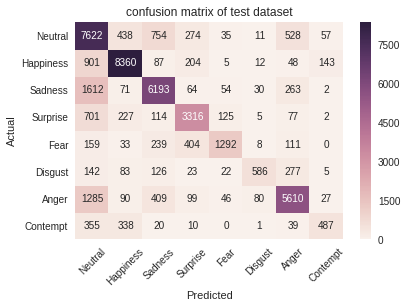

In [0]:
Y_train_pred,Y_test_pred=plot_confusion_matrix()

In [0]:
test=y_test.idxmax(axis=1)
pred=Y_test_pred.argmax(axis=1)

In [0]:
cmp=pd.DataFrame({'test':test.values,'pred':pred})

In [0]:
anger_neau=cmp[(cmp.pred==6)&(cmp.test==6)].index
sad_neau=cmp[(cmp.pred==2)&(cmp.test==0)].index

In [0]:
X_test.shape

(44741, 128, 128, 1)

In [0]:
anger_neau_img=X_test[anger_neau]

# use data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                 shear_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True)


In [0]:
train_gen=datagen.fit(train)

In [0]:
datagen.fit(X_train)

In [0]:
 
%%time
batch_size = 200
epochs = 50

model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
        epochs=epochs,samples_per_epoch=len(X_train),
        verbose=1,
        validation_data=(np.array(X_test), np.array(y_test)),
#         shuffle=True,
        callbacks=[lr_reducer, early_stopper, checkpointer])
  